In [368]:
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

In [417]:
!cp monitoring_gs.pickle monitoring_gs_2.pickle
total_scores_gs = pickle.load(open('total_scores_gs.pickle','rb'))
monitoring = pickle.load(open('monitoring_gs_2.pickle','rb'))


In [418]:
for i in total_scores_gs.keys():
    print(i, len(total_scores_gs[i]), max(total_scores_gs[i]))

(1, 0.003, 2, 300, 1, 0.99, 0.01, 10, 2, 0.0001, 0.001, 1, (256, 128)) 1087 0.20000000298023224
(23, 0.003, 2, 500, 1, 0.99, 0.01, 2, 6, 0.0001, 0.001, 1, (256, 128)) 92 0.10000000149011612
(15, 0.003, 2, 500, 1, 0.99, 0.01, 2, 3, 0.0001, 0.001, 1, (256, 128)) 48 0.10000000149011612
(15, 0.003, 2, 500, 1, 0.99, 0.01, 10, 8, 0.0001, 0.001, 1, (256, 128)) 271 0.20000000298023224
(44, 0.003, 3, 300, 1.0, 0.99, 0.01, 5, 8, 0.0001, 0.001, 1, (128, 128)) 444 0.19000000320374966
(6243, 0.003, 1, 1000, 0.2, 0.99, 0.01, 10, 12, 0.0001, 0.001, 1, (512, 256, 128), False) 63 0.10000000149011612
(9, 0.003, 1, 500, 0.2, 0.99, 0.01, 5, 4, 0.01, 0.01, 1, (128, 128), False) 320 0.20000000298023224
(1, 0.003, 2, 300, 0.5, 0.99, 0.001, 10, 1, 0.01, 0.0001, 1, (128, 128), False) 118 0.10000000149011612
(6243, 0.003, 2, 300, 0.2, 0.99, 0.01, 10, 12, 0.0001, 0.001, 1, (768, 512), False) 762 2.7000000402331352
(1, 0.003, 3, 500, 0.5, 0.99, 0.001, 2, 1, 0.01, 0.0001, 1, (512, 256, 128), False) 15 0.0900000017

In [421]:
import numpy as np
running_average = []
for k in range(len(total_scores_gs[i])):
    running_average.append(np.mean(total_scores_gs[i][:k][-100:]))


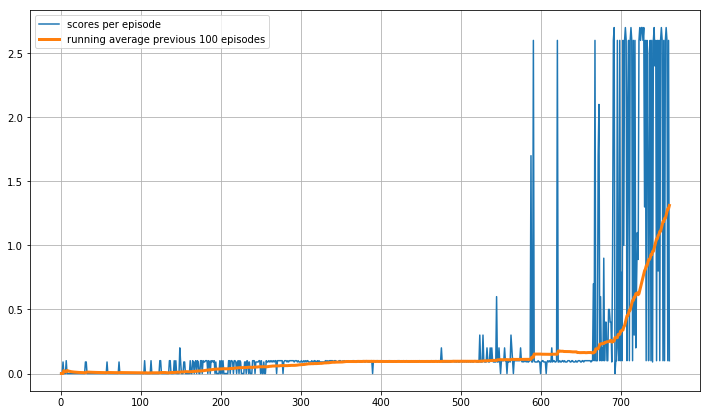

In [422]:
i =(6243, 0.003, 2, 300, 0.2, 0.99, 0.01, 10, 12, 0.0001, 0.001, 1, (768, 512), False) 
plt.figure(figsize=(12,7))
plt.plot(total_scores_gs[i], label='scores per episode')
plt.plot(running_average, label='running average previous 100 episodes', 
         linewidth=3, linestyle='-')
plt.grid()
plt.legend()


In [424]:
# Use the following to plot the behaviour of the models during training.
plt.plot( monitoring[i]['gradient_critic_0'] )
plt.plot( monitoring[i]['gradient_critic_1'] )
plt.title('gradient_critics')
plt.figure()
plt.plot( monitoring[i]['gradient_actor_0'] )
plt.plot( monitoring[i]['gradient_actor_1'] )
plt.title('gradient_actors')

plt.figure()
plt.plot( monitoring[i]['param_mean_critic_0'], label='c_0' )
plt.plot( monitoring[i]['param_mean_critic_1'], label='c_1' )
plt.title('param_mean_critics')
plt.legend()
plt.figure()
plt.plot( monitoring[i]['param_mean_actor_0'] , label='a_0')
plt.plot( monitoring[i]['param_mean_actor_1'] , label='a_1')
plt.legend()
plt.title('param_mean_actors')

plt.figure()
plt.title('gradient_prop_critics')
plt.plot( monitoring[i]['gradient_prop_critic_0'], label='0' )
plt.plot( monitoring[i]['gradient_prop_critic_1'],label='1' )
plt.legend()
plt.figure()
plt.title('gradient_prop_actors')
plt.plot( monitoring[i]['gradient_prop_actor_0'] )
plt.plot( monitoring[i]['gradient_prop_actor_1'] )


plt.figure(figsize=(10,5))
plt.plot(monitoring[i]['mean_action_0_actor_1'], label='actor 1')
plt.plot(monitoring[i]['mean_action_1_actor_1'], label='actor 1')
plt.plot(monitoring[i]['mean_action_0_actor_0'], label='actor 0')
plt.plot(monitoring[i]['mean_action_1_actor_0'], label='actor 0')
plt.legend()
plt.title('mean_actions_actors')
plt.figure(figsize=(10,5))
plt.plot(monitoring[i]['std_action_0_actor_1'], label='actor 1')
plt.plot(monitoring[i]['std_action_1_actor_1'], label='actor 1')
plt.plot(monitoring[i]['std_action_0_actor_0'], label='actor 0')
plt.plot(monitoring[i]['std_action_1_actor_0'], label='actor 0')
plt.legend()
plt.title('std_actions_actors')

plt.figure(figsize=(10,5))
plt.plot(monitoring[i]['critic_result_0'], label='c_0')
plt.plot(monitoring[i]['critic_result_1'], label='c_1')
plt.plot(monitoring[i]['critic_target_result_0'], label='c_t_0', alpha=0.3)
plt.plot(monitoring[i]['critic_target_result_1'], label='c_t_1', alpha=0.3)
plt.title('critic_results')
plt.legend()

TypeError: list indices must be integers or slices, not str